In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df_labeled = pd.read_parquet('../../data/processed/ds_labeled.parquet')

In [99]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   id_prenotazione                     460509 non-null  object             
 1   id_paziente                         460509 non-null  object             
 2   data_nascita                        460509 non-null  datetime64[ns, UTC]
 3   sesso                               460509 non-null  object             
 4   regione_residenza                   460509 non-null  object             
 5   tipologia_servizio                  460509 non-null  object             
 6   descrizione_attivita                460509 non-null  object             
 7   data_contatto                       460509 non-null  object             
 8   tipologia_struttura_erogazione      460509 non-null  object             
 9   id_professionista_sanitari

In [100]:
cols_to_drop = df_labeled.columns[[0,1,2,3,5,6,7,9,11,12,14,15]]
df = df_labeled.drop(columns=cols_to_drop)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   regione_residenza                   460509 non-null  object
 1   tipologia_struttura_erogazione      460509 non-null  object
 2   tipologia_professionista_sanitario  460509 non-null  object
 3   fascia_eta                          460509 non-null  object
 4   incremento_teleassistenze           460509 non-null  object
dtypes: object(5)
memory usage: 17.6+ MB


In [102]:
for col in df.columns:
    df[col] = df[col].factorize()[0]

In [103]:
df.to_parquet('../../data/processed/prova.parquet')
print(df)

        regione_residenza  tipologia_struttura_erogazione  \
0                       0                               0   
1                       1                               1   
2                       2                               2   
3                       3                               0   
4                       4                               2   
...                   ...                             ...   
460504                 12                               2   
460505                  7                               2   
460506                  5                               3   
460507                  3                               0   
460508                 12                               2   

        tipologia_professionista_sanitario  fascia_eta  \
0                                        0           0   
1                                        0           1   
2                                        1           0   
3                                  

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [105]:
cost = []
K = range(1, 15) # Range di valori per k (numero di cluster)

In [106]:
from sklearn.cluster import KMeans


for numero_cluster in K:
    kmeans = KMeans(n_clusters=numero_cluster, init='k-means++', n_init=20, verbose=1)
    kmeans.fit(df_normalized)
    cost.append(kmeans.inertia_) # Calcolo dell'inertia

Initialization complete
Iteration 0, inertia 8054602.35431306.
Iteration 1, inertia 2302544.999999976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4273685.449564669.
Iteration 1, inertia 2302544.999999976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2993838.2663962315.
Iteration 1, inertia 2302544.999999976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5544086.370838947.
Iteration 1, inertia 2302544.999999976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4154679.2013892895.
Iteration 1, inertia 2302544.999999976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2996186.1468503885.
Iteration 1, inertia 2302544.999999976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4750940.281810675.
Iteration 1, inertia 2302544.99999

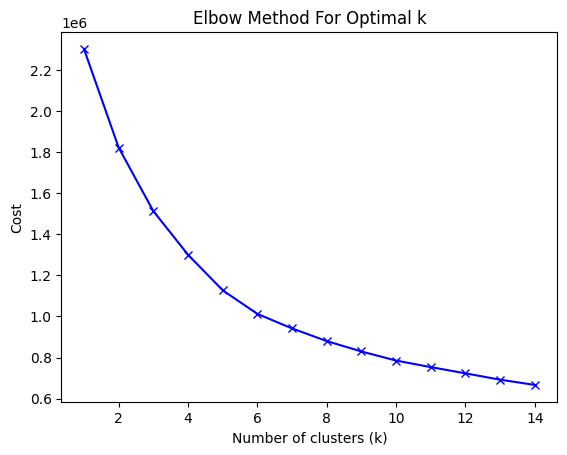

In [127]:
# Grafica il costo per ogni k
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('../../data/graph/elbow_method.png')
plt.show()

In [128]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, verbose=1)

In [129]:
clusters = kmeans.fit_predict(df_normalized)

Initialization complete
Iteration 0, inertia 1636555.765217331.
Iteration 1, inertia 1378989.825781483.
Iteration 2, inertia 1321382.2231999428.
Iteration 3, inertia 1238784.9240423006.
Iteration 4, inertia 1145045.3849413209.
Iteration 5, inertia 1074535.0719946802.
Iteration 6, inertia 1058409.929663936.
Iteration 7, inertia 1053031.733875629.
Iteration 8, inertia 1052155.7365130647.
Iteration 9, inertia 1051859.5661616335.
Iteration 10, inertia 1051746.2271475124.
Iteration 11, inertia 1051733.2273384146.
Converged at iteration 11: center shift 7.130738850444475e-08 within tolerance 0.00010994250563283255.
Initialization complete
Iteration 0, inertia 1928171.3868138187.
Iteration 1, inertia 1105520.3086481155.
Iteration 2, inertia 1046332.2740196023.
Iteration 3, inertia 1044884.0229430358.
Iteration 4, inertia 1044865.4679479763.
Converged at iteration 4: center shift 2.6649355911632053e-05 within tolerance 0.00010994250563283255.
Initialization complete
Iteration 0, inertia 179378

In [130]:
np.unique(clusters) 
df_normalized['cluster'] = clusters
df_normalized.to_parquet('../../data/processed/prova.parquet')

In [131]:
df_normalized.head()

,regione_residenza,tipologia_struttura_erogazione,tipologia_professionista_sanitario,fascia_eta,incremento_teleassistenze,cluster
0,-1.570059,-1.613087,-0.543116,-1.506991,-1.495405,4
1,-1.322904,-0.729246,-0.543116,-1.005439,-0.393867,5
2,-1.075750,0.154595,-0.162669,-1.506991,-0.393867,5
3,-0.828596,-1.613087,0.217777,-1.005439,-0.393867,5
4,-0.581441,0.154595,-0.162669,-0.503887,-0.393867,5


In [132]:
true_labels = df_normalized.incremento_teleassistenze.to_numpy()

In [133]:
true_labels

array([-1.49540468, -0.39386683, -0.39386683, ..., -0.39386683,
       -0.39386683, -0.39386683])

In [134]:
from collections import Counter

In [135]:
def calculate_purity(clusters, true_labels):
    print('Clusters:', clusters)

    N = len(true_labels) # number of data points
    purity_sum = 0

    for cluster_id in np.unique(clusters):
        # Obtain the indices of data points in the cluster
        print(cluster_id)

        cluster_indices = np.where(clusters == cluster_id)[0] # [0] to get the array from the tuple, as np.where returns a tuple
        print('Cluster indices:', cluster_indices)

        # Obtain the true labels of data points in the cluster
        cluster_labels = true_labels[cluster_indices]
        print('Cluster labels', cluster_labels)

        # Count the number of data points in each class
        most_common_label, count = Counter(cluster_labels).most_common(1)[0] # most_common returns a list of tuples, we take the first one
        print(f'Most common label: {most_common_label}, count: {count}')

        purity_sum += count
        print('\n')

    purity = purity_sum / N
    return purity


In [136]:
purity = calculate_purity(clusters, true_labels)
print('Purity is:', purity)

Clusters: [4 5 5 ... 2 0 3]
0
Cluster indices: [    16     25     26 ... 460487 460494 460507]
Cluster labels [-0.39386683 -0.39386683 -0.39386683 ... -0.39386683 -0.39386683
 -0.39386683]
Most common label: -0.39386683423740526, count: 74631


1
Cluster indices: [    27     42     45 ... 460470 460484 460501]
Cluster labels [-0.39386683  0.70767101 -0.39386683 ...  1.80920886 -0.39386683
 -0.39386683]
Most common label: -0.39386683423740526, count: 11663


2
Cluster indices: [    13     24     33 ... 460491 460503 460506]
Cluster labels [-0.39386683 -0.39386683 -0.39386683 ...  0.70767101  0.70767101
 -0.39386683]
Most common label: -0.39386683423740526, count: 21115


3
Cluster indices: [    12     52     54 ... 460469 460496 460508]
Cluster labels [-0.39386683 -0.39386683 -0.39386683 ... -0.39386683  0.70767101
 -0.39386683]
Most common label: -0.39386683423740526, count: 21246


4
Cluster indices: [     0      5      6 ... 460428 460432 460451]
Cluster labels [-1.49540468 -0.393866